In [3]:
from sympy import *
from sympy.abc import *
init_printing()
def full_simplify(expr):
    cur = expr
    while True:
        nxt = simplify(cur)
        if cur == nxt:
            return cur
        cur = nxt

In [3]:
f = lambda x, y: 7*x - 6*y + 8
print(f(-4, 1))
print(f(-5, 0))
print(f(0, 6))
print(f(1, 3))

-26
-27
-28
-3


In [4]:
expr = y*ln(5*x - 3*y)
expr

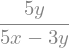

In [5]:
diff(expr, x)

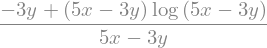

In [6]:
full_simplify(diff(expr, y))

In [8]:
M = 3*pow(x, 3) - pow(x, 2)*pow(y, 4) - 4*pow(y, 5)
M

In [9]:
# M_x
M.diff(x)

In [10]:
# M_y
M.diff(y)

In [11]:
# M_xx
M.diff(x, 2)

In [12]:
# M_xy
M.diff(x).diff(y)

In [28]:
Z = 4*exp(pow(x,2) - 2*y)
Z

In [31]:
point = [(x, 4), (y, 8)]
# equation for a tagent plane
# z = f(a, b) + f_x(a, b)(x - a) + f_y(a, b)(y - b)
Z.subs(point) + \
Z.diff(x).subs(point) * (x - point[0][1]) + \
Z.diff(y).subs(point)* (y - point[1][1])

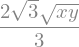

In [35]:
f = 4*sqrt((x*y)/12)
f

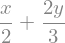

In [37]:
point = [(x, 8), (y, 6)]
# equation for a tagent plane
# z = f(a, b) + f_x(a, b)(x - a) + f_y(a, b)(y - b)
plane = f.subs(point) + \
f.diff(x).subs(point) * (x - point[0][1]) + \
f.diff(y).subs(point)* (y - point[1][1])
plane

In [39]:
plane.subs(x, 8.24).subs(y, 6.2)

In [41]:
z = x * exp(5*y)
z

In [43]:
full_simplify(z.subs(x, pow(t, 4)).subs(y, -3 + 2*t).diff(t))

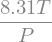

In [47]:
V = 8.31*T/P


In [50]:
# chain rule:
# dz   df   dx   df   dy
# -- = -- * -- + -- * -- 
# dt   dx   dt   dy   dt
dT_dt = 0.15
dP_dt = 0.09
P_t = 29
T_t = 310
(8.31 * dT_dt) / P_t - (8.31 * T_t * dP_dt) / P_t**2

In [115]:
def second_derivative_test(f, x, y):
    f_x = f.diff(x)
    f_y = f.diff(y)
    f_xx = f.diff(x, 2)
    f_yy = f.diff(y, 2)
    f_xy = f.diff(x).diff(y)
    
    cps = solve([f_x, f_y])
    critical_points = cps if type(cps) == list else [cps]
    print(critical_points)
    print(f"Critical numbers are: {', '.join(map(str, critical_points))}")
    minimums = []
    maximums = []
    non_ms = []
    for cp in critical_points:
        print(cp)
        if not cp[x].is_real or not cp[y].is_real:
            continue
        D = f_xx.subs(x, cp[x]).subs(y, cp[y]) * \
            f_yy.subs(x, cp[x]).subs(y, cp[y]) - \
            pow(f_xy.subs(x, cp[x]).subs(y, cp[y]), 2)
        if D > 0 and f_xx.subs(x, cp[x]).subs(y, cp[y]) > 0:
            minimums.append((cp, f.subs(x, cp[x]).subs(y, cp[y]), D))
        elif D > 0 and f_xx.subs(x, cp[x]).subs(y, cp[y]) < 0:
            maximums.append((cp, f.subs(x, cp[x]).subs(y, cp[y]),D))
        elif D < 0:
            non_ms.append((cp, f.subs(x, cp[x]).subs(y, cp[y]),D))
    
    print(f"Minimums")
    for m in sorted(minimums, key=lambda m: m[1]):
        print(f"f({m[0]}) = {m[1]}")   
    print(f"Maximums")
    for m in reversed(sorted(maximums, key=lambda m: m[1])):
        print(f"f({m[0]}) = {m[1]}") 
        
    print(f"Non Max/Min critical points")
    for m in sorted(non_ms, key=lambda m: m[1]):
        print(f"f({m[0]}) = {m[1]}")          

f = 2*pow(x, 4) + 2*pow(y, 4) - x*y
# S = 9*x + 5*y - 7*pow(x, 2) - 2*pow(y, 2) - 3*x*y
second_derivative_test(f, x, y)
f

[{x: 0, y: 0}, {x: -sqrt(2)/4, y: -sqrt(2)/4}, {x: sqrt(2)/4, y: sqrt(2)/4}, {x: -sqrt(2)*I/4, y: sqrt(2)*I/4}, {x: sqrt(2)*I/4, y: -sqrt(2)*I/4}, {x: -1/4 - I/4, y: 1/4 - I/4}, {x: -1/4 + I/4, y: 1/4 + I/4}, {x: 1/4 - I/4, y: -1/4 - I/4}, {x: 1/4 + I/4, y: -1/4 + I/4}]
Critical numbers are: {x: 0, y: 0}, {x: -sqrt(2)/4, y: -sqrt(2)/4}, {x: sqrt(2)/4, y: sqrt(2)/4}, {x: -sqrt(2)*I/4, y: sqrt(2)*I/4}, {x: sqrt(2)*I/4, y: -sqrt(2)*I/4}, {x: -1/4 - I/4, y: 1/4 - I/4}, {x: -1/4 + I/4, y: 1/4 + I/4}, {x: 1/4 - I/4, y: -1/4 - I/4}, {x: 1/4 + I/4, y: -1/4 + I/4}
{x: 0, y: 0}
{x: -sqrt(2)/4, y: -sqrt(2)/4}
{x: sqrt(2)/4, y: sqrt(2)/4}
{x: -sqrt(2)*I/4, y: sqrt(2)*I/4}
{x: sqrt(2)*I/4, y: -sqrt(2)*I/4}
{x: -1/4 - I/4, y: 1/4 - I/4}
{x: -1/4 + I/4, y: 1/4 + I/4}
{x: 1/4 - I/4, y: -1/4 - I/4}
{x: 1/4 + I/4, y: -1/4 + I/4}
Minimums
f({x: -sqrt(2)/4, y: -sqrt(2)/4}) = -1/16
f({x: sqrt(2)/4, y: sqrt(2)/4}) = -1/16
Maximums
Non Max/Min critical points
f({x: 0, y: 0}) = 0


In [116]:
f = pow(x, 3) + pow(y, 3) + 15*pow(x, 2) - 18*pow(y,2) - 1
second_derivative_test(f, x, y)
f

[{x: -10, y: 0}, {x: -10, y: 12}, {x: 0, y: 0}, {x: 0, y: 12}]
Critical numbers are: {x: -10, y: 0}, {x: -10, y: 12}, {x: 0, y: 0}, {x: 0, y: 12}
{x: -10, y: 0}
{x: -10, y: 12}
{x: 0, y: 0}
{x: 0, y: 12}
Minimums
f({x: 0, y: 12}) = -865
Maximums
f({x: -10, y: 0}) = 499
Non Max/Min critical points
f({x: -10, y: 12}) = -365
f({x: 0, y: 0}) = -1


In [122]:
S = 4*x + 9*y - 3*pow(x, 2) - 6*pow(y, 2) - 5*x*y
S

In [123]:
S.diff(x)

In [124]:
S.diff(y)

In [125]:
second_derivative_test(S, x, y)

[{x: 3/47, y: 34/47}]
Critical numbers are: {x: 3/47, y: 34/47}
{x: 3/47, y: 34/47}
Minimums
Maximums
f({x: 3/47, y: 34/47}) = 159/47
Non Max/Min critical points


In [194]:
def lagrange_optimize(f, g, vs):
    lam = Symbol('lam')
    eqs = [g]
    for v in vs:
        eqs.append(f.diff(v) - lam * g.diff(v))
    sls = solve(eqs)
    solutions = sls if type(sls) == list else [sls]
    for s in solutions:
        #print(list(map(lambda x: x.is_real, map(lambda u: s[u], vs))))
        real_values = list(filter(lambda k: k.is_real, map(lambda u: s[u], vs)))
        if len(real_values) != len(vs):
            continue
        print("f(", end='')
        params = ''
        for v in vs:
            params += f"{s[v]},"
        print(params.strip(','), end='')
        print(") = ", end='')

        point = f
        for v in vs:
            point = point.subs(v, s[v])
        print(point)
        

lagrange_optimize(pow(x, 2) + 2*pow(y, 2), pow(x, 2) + pow(y, 2) - 1, [x, y])   

f(-1,0) = 1
f(1,0) = 1
f(0,-1) = 2
f(0,1) = 2


In [195]:
from sympy.abc import *
f = x*y*0.05 + y*z*0.10 + 0.03*(y*z + 2*x*z)
g = x*y*z - 300
# x depth
# y = front
# z = height
lagrange_optimize(f, g, [x, y, z])

f(11.9113842519643,5.49756196244507,4.58130163537090) = 9.82253594754995


In [196]:
from sympy.abc import *

f = pow(x, 2) + x*y + 2*pow(y, 2) + 1300
g = x + y - 1700
lagrange_optimize(f, g, [x, y])

f(1275,425) = 2530050


In [198]:
from sympy.abc import *

f = 10*pow(p, 0.8)*pow(r, 0.2)
g = p*400 + r*2000 - 300000
lagrange_optimize(f, g, [p, r])

f(600.000000000000,30.0000000000000) = 3295.68162991835
